In [392]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys

#Step 0
l = 1000 # 1000 time steps
t = np.linspace(0, 100, l) # a time interval of 100 seconds
a = np.zeros(1000) # initialize accelaration
v = np.zeros(1000) # initialize velocity
s = np.zeros(1000) # initialize position

variance_Zs = 0  # variance of system error with respect to position
variance_Zv = 0  # variance of system error with respect to velocity
variance_Za = 0 # variance of system error with respect to acceleration
variance_Ms = 2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to position
variance_Mv = 0.2 # /sigma_Ms^2 = 2 # variance of measurement error with respect to velocity
variance_Ma = 0.02 # /sigma_Ma^2 =0.2 # variance of measurement error with respect to acceleration
noise_Zs = np.random.normal(0,variance_Zs,1000)
noise_Zv = np.random.normal(0,variance_Zv,1000) 
noise_Za = np.random.normal(0,variance_Za,1000) 
noise_Ms = np.random.normal(0,variance_Ms,1000)  
noise_Mv = np.random.normal(0,variance_Mv,1000)
noise_Ma = np.random.normal(0,variance_Ma,1000)

#Step 2
Ts = 100/l

Ad = np.matrix([[1,Ts,0.5*(Ts*Ts)],
                  [0,1,Ts],
                  [0,0,0]]) ## not sure if it should be 0,0,1 (from textbook) or 0,0,0 (from my derivation)

Bd = np.array ([0.5*(Ts*Ts),Ts,1]).reshape(-1,1)
u = np.zeros((1,1000))
u[:,200:225] = -10 # step function


G = np.matrix ([[1,0,0],[0,1,0],[0,0,1]])
Gd = Ad
Md = Gd

z = np.vstack((noise_Zs,noise_Zv,noise_Za))
w = np.vstack((noise_Ms,noise_Mv,noise_Ma))

StateMatrix = np.zeros((3,1000))
MeasurementMatrix = np.zeros((3,1000))

v[0] = 50
v[-1] = 50

# #braking process
# acce = -10 # acceleration
# vel = 50 # current velocity (initially equal to u)
# time_interval = 100/1000 # time interval between each time step
# braking_timesteps = [] # list to store the timesteps in which the braking happens

# for i in range(1, 1000):
#      # time interval between each time step
#     vel = vel + acce*time_interval # calculate the velocity at the current time step
    
#     if vel <= 0: # if velocity becomes zero or negative, braking happens
#         braking_timesteps.append(i)
#         break # stop the loop if braking happens and we don't need to check further timesteps
# print("Timesteps in which the braking happens:", braking_timesteps)
# braking_time = np.array(braking_timesteps)
# braking_time = braking_time.astype(float)

# braking_start = 99
# braking_time = np.array(braking_timesteps) # convert the braking timesteps to braking time
# braking_time = int(braking_time[0]) # convert the first (and only) element of braking_time to int

# braking_end = braking_start + braking_time
# u[:,braking_start:braking_end] = -10 # step function
# #end of braking process

x = np.array ([[s[0]],[v[0]],[a[0]]])


# x0 = np.array([0, 50, 0]) #initial velocity +50
y = np.array ([0,0,1])

z_0 = z[:,0].reshape (3,1)
w_0 = w[:,0].reshape (3,1)
#print (x.shape)
#print (z_0.shape)
#measurement: say we can measure positioin, velocity and accleration
C = np.matrix ([[1,0,0],[0,1,0],[0,0,1]])
D = np.array ([0,0,1]).reshape(-1,1)
StateMatrix[:,0] = np.squeeze(x)
MeasurementMatrix[:,0] = np.squeeze(y)


for k in range(0, len(t)):

      z_k = z[:,k].reshape (3,1)
      w_k = w[:,k].reshape (3,1)
      u_k = u[:,k].reshape (1,1)

      x = Ad * x + Bd * u_k + Gd * z_k
      y = C * x + Md * w_k
      
      
      StateMatrix[:,k] = np.squeeze(x)
      MeasurementMatrix[:,k] = np.squeeze(y)

#w_T = w[:,len(t)-1].reshape (3,1) # the measurement error at step 
#u_T = u[:,len(t)-1].reshape (1,1)
#y = C * x + D * u_T + Md * w_T
#MeasurementMatrix[:,len(t)-1] = np.squeeze(y)  



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
l = 1000 # 1000 time steps
t = np.linspace(0, 100, l) # a time interval of 100 seconds
a = np.zeros(1000) # initialize accelaration
v = np.zeros(1000) # initialize velocity
s = np.zeros(1000) # initialize position
variance_Zs = 0  # variance of system error with respect to position
variance_Zv = 0  # variance of system error with respect to velocity
variance_Za = 0 # variance of system error with respect to acceleration
variance_Ms = 2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to position
variance_Mv = 0.2 # /sigma_Ms^2 = 2 # variance of measurement error with respect to velocity
variance_Ma = 0.02 # /sigma_Ma^2 =0.2 # variance of measurement error with respect to acceleration
noise_Zs = np.random.normal(0,variance_Zs,1000)
noise_Zv = np.random.normal(0,variance_Zv,1000) 
noise_Za = np.random.normal(0,variance_Za,1000) 
noise_Ms = np.random.normal(0,variance_Ms,1000)  
noise_Mv = np.random.normal(0,variance_Mv,1000)
noise_Ma = np.random.normal(0,variance_Ma,1000)
Ts = 100/l
Ad = np.matrix([[1,Ts,0.5*(Ts*Ts)],
                  [0,1,Ts],
                  [0,0,0]]) ## not sure if it should be 0,0,1 (from textbook) or 0,0,0 (from my derivation)
Bd = np.array ([0.5*(Ts*Ts),Ts,1]).reshape(-1,1)
u = np.zeros((1,1000))
u[:,200:225] = -10 # step function
G = np.matrix ([[1,0,0],[0,1,0],[0,0,1]])
Gd = Ad
Md = Gd
z = np.vstack((noise_Zs,noise_Zv,noise_Za))
w = np.vstack((noise_Ms,noise_Mv,noise_Ma))
StateMatrix = np.zeros((3,1000))
MeasurementMatrix = np.zeros((3,1000))
v[0] = 50
x = np.array ([[s[0]],[v[0]],[a[0]]])
y = np.array ([0,0,1])
z_0 = z[:,0].reshape (3,1)
w_0 = w[:,0].reshape (3,1)
C = np.matrix ([[1,0,0],[0,1,0],[0,0,1]])
D = np.array ([0,0,1]).reshape(-1,1)
StateMatrix[:,0] = np.squeeze(x)
MeasurementMatrix[:,0] = np.squeeze(y)
for k in range(0, len(t)):
      z_k = z[:,k].reshape (3,1)
      w_k = w[:,k].reshape (3,1)
      u_k = u[:,k].reshape (1,1)
      x = Ad * x + Bd * u_k + Gd * z_k
      if x[1]
      y = C * x + Md * w_k
      StateMatrix[:,k] = np.squeeze(x)
      MeasurementMatrix[:,k] = np.squeeze(y)

In [ ]:
# Create a 3x1 subplot with acceleration-time at the top, velocity-time in the middle, and position-time at the bottom
fig, axs = plt.subplots(3, 1, figsize=(12, 20))

# Plot acceleration-time subplot
axs[0].plot(t, StateMatrix[2], label='True Acceleration')
axs[0].plot(t, MeasurementMatrix[2], label='Measured Acceleration')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Acceleration (m/s^2)')
axs[0].set_title('Acceleration vs. Time')
axs[0].legend()

# Plot velocity-time subplot
axs[1].plot(t, StateMatrix[1], label='True Velocity')
axs[1].plot(t, MeasurementMatrix[1], label='Measured Velocity')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Velocity (m/s)')
axs[1].set_title('Velocity vs. Time')
axs[1].legend()

# Plot position-time subplot
axs[2].plot(t, StateMatrix[0], label='True Position')
axs[2].plot(t, MeasurementMatrix[0], label='Measured Position')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Position (m)')
axs[2].set_title('Position vs. Time')
axs[2].legend()

plt.tight_layout()
plt.show()


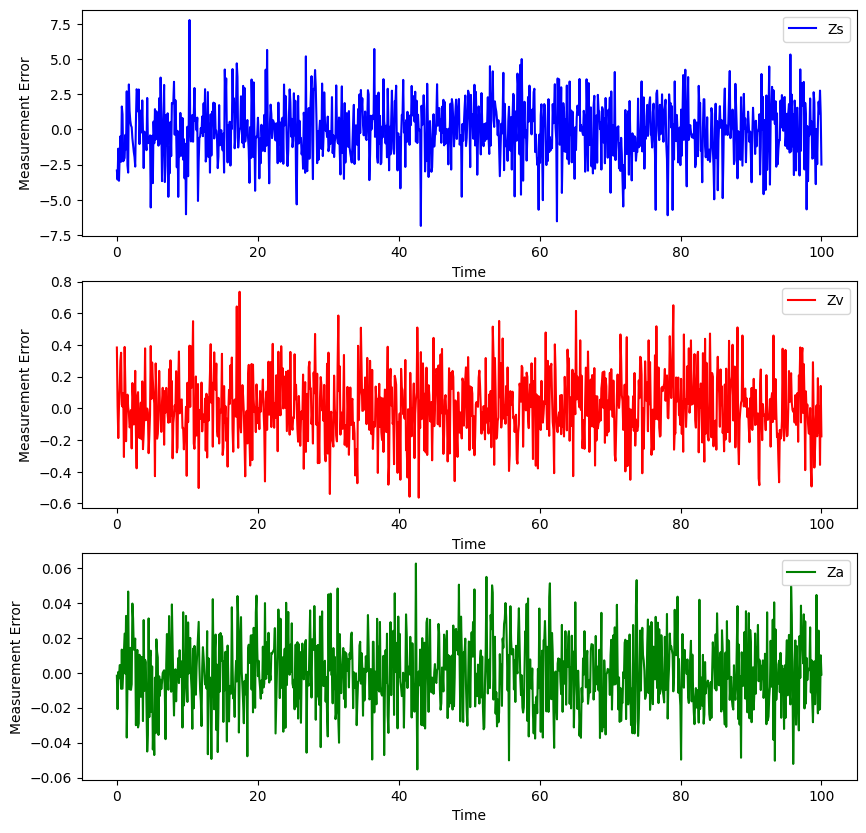

In [393]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(t, noise_Ms, 'b-', label='Zs')
ax1.set_xlabel('Time')
ax1.set_ylabel('Measurement Error')
ax1.legend()

ax2.plot(t, noise_Mv, 'r-', label='Zv')
ax2.set_xlabel('Time')
ax2.set_ylabel('Measurement Error')
ax2.legend()

ax3.plot(t, noise_Ma, 'g-', label='Za')
ax3.set_xlabel('Time')
ax3.set_ylabel('Measurement Error')
ax3.legend()

plt.show()


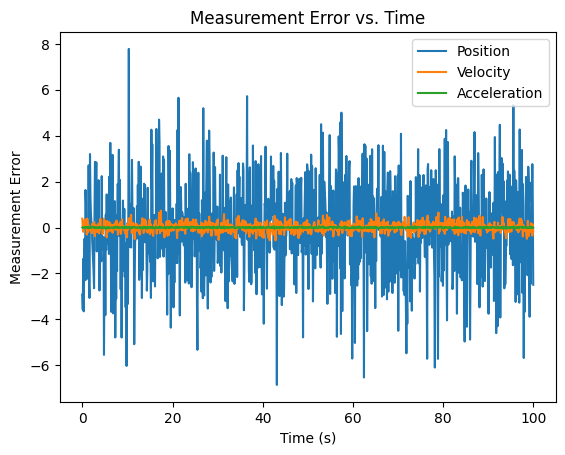

In [394]:
plt.plot(t, w[0], label='Position')
plt.plot(t, w[1], label='Velocity')
plt.plot(t, w[2], label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Measurement Error')
plt.title('Measurement Error vs. Time')
plt.legend()
plt.show()



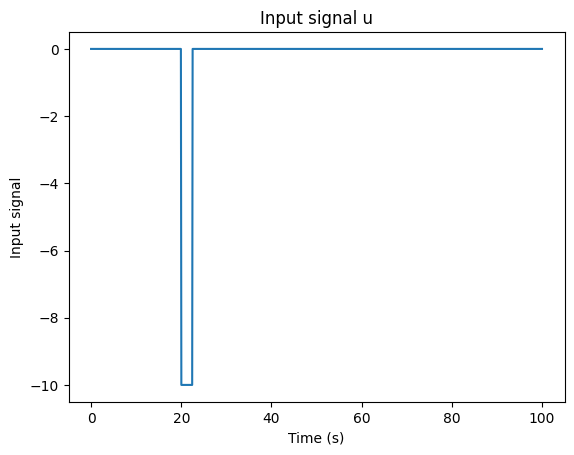

In [395]:
plt.plot(t, u[0])
plt.xlabel('Time (s)')
plt.ylabel('Input signal')
plt.title('Input signal u')
plt.show()

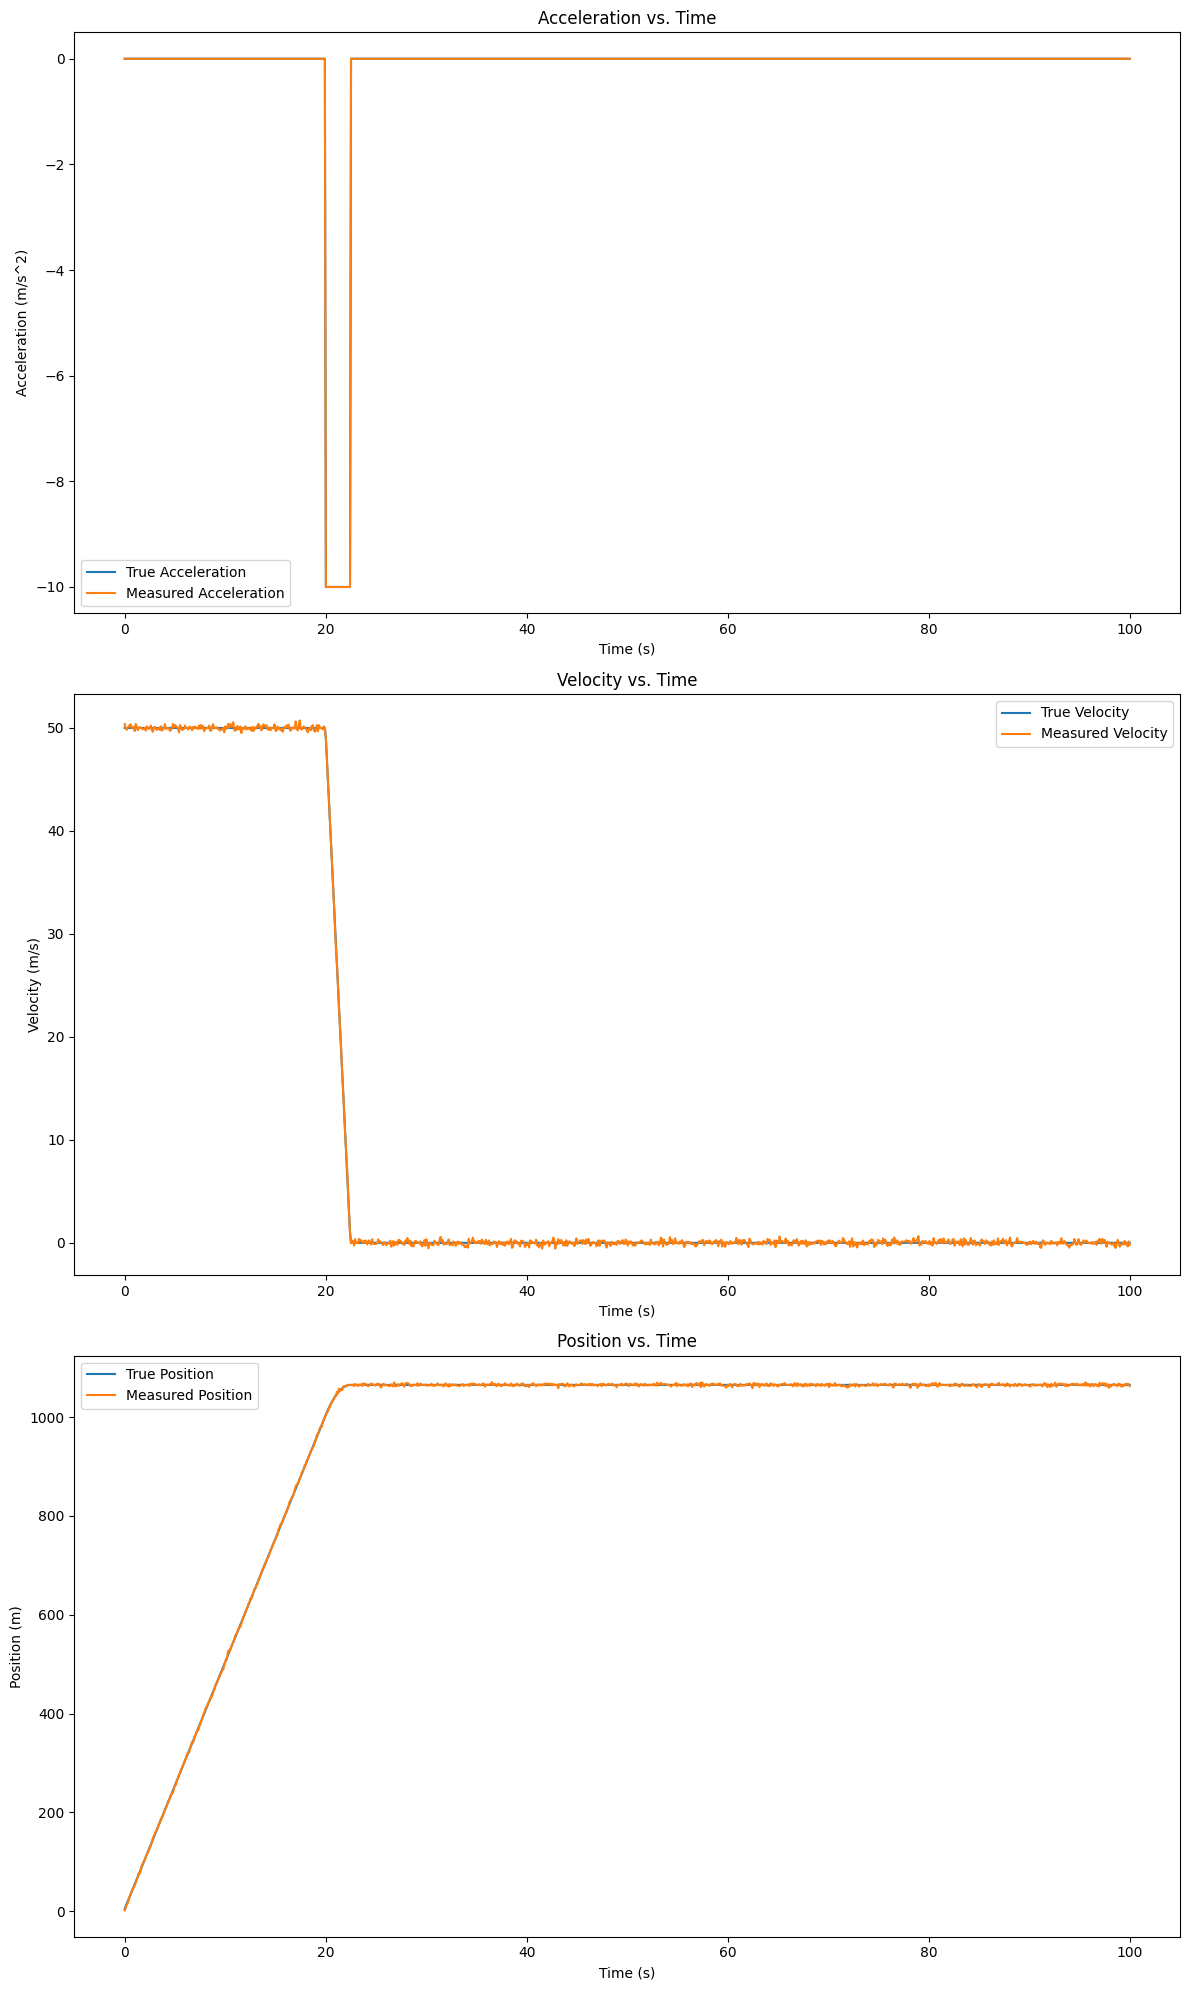

In [397]:

#Step 3
# print (StateMatrix.shape)

# row1 = StateMatrix[0]
# row2 = StateMatrix[1]
# row3 = StateMatrix[2]

# fig, axs = plt.subplots(1,3,figsize=(20,4))
# axs[0].set_title("control input")
# line1, = axs[0].plot(t, np.squeeze(u) , '.', color='blue', label='control input')
# axs[0].legend(handles=[line1], loc='lower center')

# fig, axs = plt.subplots(1,3,figsize=(20,4))
# axs[0].set_title("With system noise")
# line3, = axs[2].plot(t, row1 , '.', color='purple', label='position')
# line2, = axs[1].plot(t, row2 , '.', color='green', label='velocity')
# line1, = axs[0].plot(t, row3 , '.', color='blue', label='acceleration')
# axs[0].legend(handles=[line1,line2,line3,], loc='lower center')

# fig, axs = plt.subplots(1,3,figsize=(20,4))
# axs[0].set_title("With system noise")
# line3, = axs[2].plot(t, row1 , '.', color='purple', label='position')
# line2, = axs[1].plot(t, row2 , '.', color='green', label='velocity')
# line1, = axs[0].plot(t, row3 , '.', color='blue', label='acceleration')
# axs[0].legend(handles=[line1,line2,line3,], loc='lower center')

In [398]:
#Step 3: !!! Kalman Filter integrated into loop needed

#Correction

A = Ad

y_k_predicted = C * x_k_predicted + D * u_k #1

delta_y_k = y_k - y_k_predicted #2

K_k = P_k_predicted * C.T * Term_inv #3
Term = C * P_k_predicted * C.T + R_k
Term_inverse = np.linalg.inv(Term)

x_k_corrected = x_k_predicted + K_k * delta_y_k#4

P_k_corrected = (I - K_k * C) * P_k_predicted #5
I = np.identity () # consider dimension

#Prediction

x_(k+1)_predicted = Ad * x_k_corrected + Bd * u_k #6

P_(k+1)_predicted = Ad * P_k_corrected * Ad.T + Gd * Q_k *Gd.T #7

Q_k = np.matrix([[variance_Zs,0,0],
                  [0,variance_Zv,0],
                  [0,0,variance_Za]]) #covariance matrix of system errors

R_k = np.matrix([[variance_Ms,0,0],
                  [0,variance_Mv,0],
                  [0,0,variance_Ma]]) #covariance matrix of measurement errors




SyntaxError: invalid syntax (847865494.py, line 22)